# Demand Forecasting Notebook
# ===========================

# 1. Import libraries

In [10]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [11]:
df = pd.read_csv("Cleaned_Fitness_Classes_Data.csv")

# Prepare data



In [13]:
daily_demand = df.groupby('BookingEndDateTime')['Number Booked'].sum().reset_index()
daily_demand.rename(columns={'BookingEndDateTime':'ds', 'Number Booked':'y'}, inplace=True)

# Train-test split (80-20)



In [14]:
train_size = int(len(daily_demand) * 0.8)
train = daily_demand[:train_size]
test = daily_demand[train_size:]

# Train Prophet



In [15]:
model = Prophet(daily_seasonality=True, weekly_seasonality=True)
model.fit(train)

09:07:17 - cmdstanpy - INFO - Chain [1] start processing
09:07:17 - cmdstanpy - INFO - Chain [1] done processing


# Forecast on test period



In [16]:
future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)

# Compare predictions with actual test values

In [17]:
y_true = test['y'].values
y_pred = forecast['yhat'].iloc[-len(test):].values

# Validation metrics

In [18]:
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

In [19]:
print("MAE:", mae)
print("RMSE:", rmse)

MAE: 48.433796179775456
RMSE: 72.96436213685799


# Plot comparison

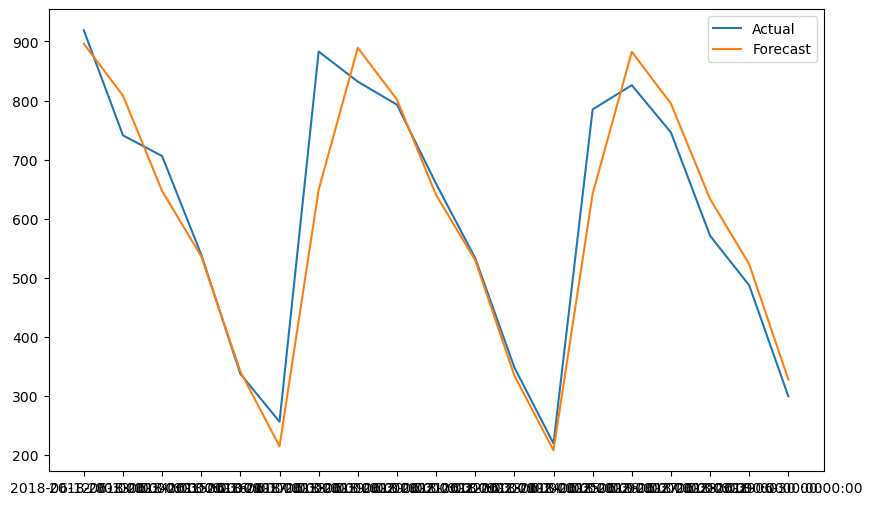

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(test['ds'], y_true, label="Actual")
plt.plot(test['ds'], y_pred, label="Forecast")
plt.legend()
plt.show()